In [152]:
from warnings import filterwarnings
filterwarnings("ignore")

In [153]:
import os
import sys

In [154]:
print(os.getcwd())

e:\ETLHive Machine Learning\Classification Project


In [155]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
parent_dir

'e:\\ETLHive Machine Learning'

In [156]:
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [157]:
from utils import evaluate_single_model_class, algo_evaluation

## Step 1 - Data Ingestion

In [158]:
import pandas as pd

df = pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [159]:
df.columns = df.columns.str.replace('[','', regex=False).str.replace(']','', regex=False).str.replace('<','', regex=False).str.replace('>','', regex=False).str.replace(' ','_')

## Target Feature - Machine Failure
1. 0 - Machine working
2. 1 - Machine Failed

## Step 2 - Perform Basic Data Quality Checks

In [160]:
df.shape

(136429, 14)

In [161]:
df.info

<bound method DataFrame.info of             id Product_ID Type  Air_temperature_K  Process_temperature_K  \
0            0     L50096    L              300.6                  309.6   
1            1     M20343    M              302.6                  312.1   
2            2     L49454    L              299.3                  308.5   
3            3     L53355    L              301.0                  310.9   
4            4     M24050    M              298.0                  309.0   
...        ...        ...  ...                ...                    ...   
136424  136424     M22284    M              300.1                  311.4   
136425  136425     H38017    H              297.5                  308.5   
136426  136426     L54690    L              300.5                  311.8   
136427  136427     L53876    L              301.7                  310.9   
136428  136428     L47937    L              296.9                  308.1   

        Rotational_speed_rpm  Torque_Nm  Tool_wear_min 

In [162]:
df.duplicated().sum()

np.int64(0)

In [163]:
df.isna().sum()

id                       0
Product_ID               0
Type                     0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

In [164]:
df.select_dtypes(include="object").nunique()

Product_ID    9976
Type             3
dtype: int64

## Step 3 - Separate X and Y (Machine Failure)

In [165]:
X = df.drop(columns=["id", "Product_ID", "Machine_failure"])
Y = df["Machine_failure"]

In [166]:
X.value_counts()

Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  Torque_Nm  Tool_wear_min  TWF  HDF  PWF  OSF  RNF
L     300.9              310.7                  1412                  57.5       16             0    0    0    0    0      35
      300.7              311.0                  1413                  52.0       91             0    0    0    0    0      15
      297.3              308.1                  1566                  31.1       154            0    0    0    0    0      11
      298.6              309.8                  1505                  45.7       144            0    0    0    0    0      11
M     301.4              311.0                  1334                  53.3       157            0    0    0    0    0       9
                                                                                                                           ..
H     295.6              306.1                  1458                  49.2       142            0    0    0    0    0       

In [167]:
Y.value_counts()

Machine_failure
0    134281
1      2148
Name: count, dtype: int64

<Axes: xlabel='Machine_failure'>

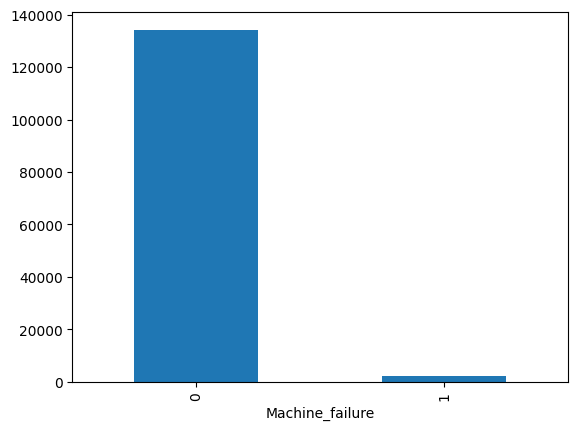

In [168]:
Y.value_counts().plot(kind="bar")

## Step 4 - Train Test Split

In [169]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [170]:
xtrain.head()

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF
12407,L,301.5,310.7,1481,43.7,77,0,0,0,0,0
85011,L,300.7,309.5,1452,43.4,85,0,0,0,0,0
65292,M,298.5,309.1,1365,57.0,27,0,0,0,0,0
18478,L,301.6,310.7,1543,31.9,16,0,0,0,0,0
100267,L,298.9,308.6,1633,32.9,124,0,0,0,0,0


In [171]:
ytrain.head()

12407     0
85011     0
65292     0
18478     0
100267    0
Name: Machine_failure, dtype: int64

In [172]:
xtest.head()

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF
123128,L,300.9,310.7,1368,62.0,12,0,0,0,1,0
54705,L,300.5,311.3,1543,36.0,190,0,0,0,0,0
40016,L,300.6,310.4,1499,38.5,114,0,0,0,0,0
75025,L,297.6,308.4,1502,38.5,130,0,0,0,0,0
120421,L,300.8,310.7,1539,38.5,203,0,0,0,0,0


In [173]:
ytest.head()

123128    1
54705     0
40016     0
75025     0
120421    0
Name: Machine_failure, dtype: int64

In [174]:
xtrain.shape

(109143, 11)

In [175]:
ytrain.shape

(109143,)

In [176]:
xtest.shape

(27286, 11)

In [177]:
ytest.shape

(27286,)

## Step 5 - Apply Preprocessing

In [178]:
cat_cols = xtrain.select_dtypes(include="object").columns.tolist()
print(cat_cols)

['Type']


In [179]:
num_cols = xtrain.select_dtypes(include="number").columns.tolist()
print(num_cols)

['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [180]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [181]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [182]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [183]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

In [184]:
pre.fit(xtrain) # type: ignore

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [185]:
xtest_pre = pre.transform(xtest) # type: ignore
xtest_pre.head()

,num__Air_temperature_K,num__Process_temperature_K,num__Rotational_speed_rpm,num__Torque_Nm,num__Tool_wear_min,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
123128,0.556949,0.546161,-1.097595,2.548063,-1.441207,-0.038436,-0.071621,-0.048677,15.699994,-0.04714,0.0,1.0,0.0
54705,0.341977,0.979262,0.164459,-0.511413,1.338396,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0
40016,0.395720,0.329610,-0.152858,-0.217233,0.151599,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0
75025,-1.216570,-1.114060,-0.131223,-0.217233,0.401451,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0
120421,0.503206,0.546161,0.135612,-0.217233,1.541400,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0


In [186]:
xtrain_pre = pre.transform(xtrain) # type: ignore
xtrain_pre.head()

,num__Air_temperature_K,num__Process_temperature_K,num__Rotational_speed_rpm,num__Torque_Nm,num__Tool_wear_min,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
12407,0.879407,0.546161,-0.282669,0.394662,-0.426183,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0
85011,0.449463,-0.320041,-0.491809,0.359361,-0.301258,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0
65292,-0.732883,-0.608775,-1.119230,1.959702,-1.206971,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,0.0,1.0
18478,0.933150,0.546161,0.164459,-0.993869,-1.378744,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0
100267,-0.517911,-0.969693,0.813515,-0.876197,0.307756,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0


## Step 6 - Model Building and Algo Evaluation

In [187]:
!uv add xgboost

Resolved 70 packages in 3ms
Audited 63 packages in 0.13ms


In [188]:
xtrain_pre.shape

(109143, 13)

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

In [190]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier(),
    XGBClassifier()
]

In [191]:
best_model, res = algo_evaluation(models, xtrain_pre, ytrain, xtest_pre, ytest)

{'model_name': 'LogisticRegression', 'model': LogisticRegression(), 'cv_mean': np.float64(0.9303), 'cv_std': np.float64(0.0091), 'f1_train': 0.9303, 'f1_test': 0.9315, 'gen_err': 0.0012}
{'model_name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'cv_mean': np.float64(0.8722), 'cv_std': np.float64(0.0089), 'f1_train': 0.9975, 'f1_test': 0.8781, 'gen_err': 0.1194}
{'model_name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'cv_mean': np.float64(0.9279), 'cv_std': np.float64(0.0075), 'f1_train': 0.9973, 'f1_test': 0.9311, 'gen_err': 0.0662}
{'model_name': 'HistGradientBoostingClassifier', 'model': HistGradientBoostingClassifier(), 'cv_mean': np.float64(0.9277), 'cv_std': np.float64(0.0088), 'f1_train': 0.9319, 'f1_test': 0.9311, 'gen_err': 0.0008}
{'model_name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None,

In [192]:
res

,model_name,model,cv_mean,cv_std,f1_train,f1_test,gen_err
0,LogisticRegression,LogisticRegression(),0.9303,0.0091,0.9303,0.9315,0.0012
1,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.9285,0.0083,0.9562,0.9284,0.0278
2,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9279,0.0075,0.9973,0.9311,0.0662
3,HistGradientBoostingClassifier,HistGradientBoostingClassifier(),0.9277,0.0088,0.9319,0.9311,0.0008
4,DecisionTreeClassifier,DecisionTreeClassifier(),0.8722,0.0089,0.9975,0.8781,0.1194


In [193]:
best_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Above model has good f1 macro in train and test and cv and generalization error is also low

## Step 7 - Evaluate Selected Model in detail

In [194]:
best_model.score(xtrain_pre, ytrain) # type: ignore

0.9961884866642845

In [195]:
best_model.score(xtest_pre, ytest) # type: ignore

0.9961518727552591

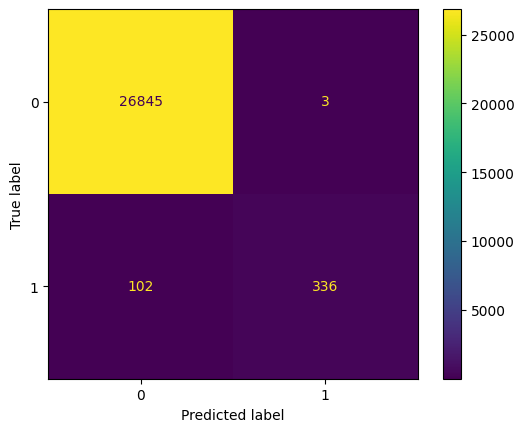

In [196]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, xtest_pre, ytest)

In [197]:
ypred_test = best_model.predict(xtest_pre) # type: ignore
ypred_test[0:5]

array([1, 0, 0, 0, 0])

In [198]:
ytest.head()

123128    1
54705     0
40016     0
75025     0
120421    0
Name: Machine_failure, dtype: int64

In [199]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



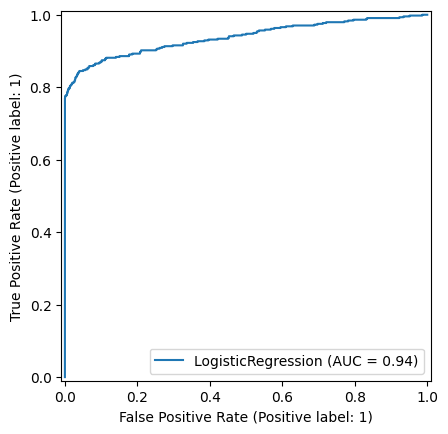

In [200]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, xtest_pre, ytest)

## From above results the model can be used for out of sample data

## Step 8 - Out of Sample prediction

In [201]:
xnew = pd.read_csv("test_machine.csv")
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [202]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [203]:
xnew.columns = xnew.columns.str.replace('[','', regex=False).str.replace(']','', regex=False).str.replace('<','', regex=False).str.replace('>','', regex=False).str.replace(' ','_')

In [204]:
xnew_pre = pre.transform(xnew) # type: ignore
xnew_pre.head()

,num__Air_temperature_K,num__Process_temperature_K,num__Rotational_speed_rpm,num__Torque_Nm,num__Tool_wear_min,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.309351,1.123629,-0.152858,-0.276069,-0.691651,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0
1,0.986893,0.762712,1.390454,-1.358653,-1.363128,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0
2,0.771921,0.329610,0.034647,-0.311371,-0.129484,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0,0.0
3,0.127005,-0.247858,-0.297092,0.853584,-1.550517,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,0.0,1.0
4,1.900524,1.701097,-0.037470,0.112249,0.151599,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,0.0,1.0


In [205]:
preds = best_model.predict(xnew_pre) # type: ignore
preds[0:5]

array([0, 0, 0, 0, 0])

In [206]:
best_model.classes_ # type: ignore

array([0, 1])

In [207]:
probs = best_model.predict_proba(xnew_pre)[:, 1] # type: ignore
probs[0:5]

array([0.00212587, 0.00104845, 0.00259254, 0.00276512, 0.00343387])

In [208]:
final_res = xnew[["id"]]
final_res["machine_failure"] = preds
final_res["probability"] = probs.round(4)

In [209]:
final_res

,id,machine_failure,probability
0,136429,0,0.0021
1,136430,0,0.0010
2,136431,0,0.0026
3,136432,0,0.0028
4,136433,0,0.0034
...,...,...,...
90949,227378,0,0.0022
90950,227379,0,0.0005
90951,227380,0,0.0030
90952,227381,0,0.0023


In [210]:
final_res["machine_failure"].value_counts()

machine_failure
0    89849
1     1105
Name: count, dtype: int64

<Axes: xlabel='machine_failure'>

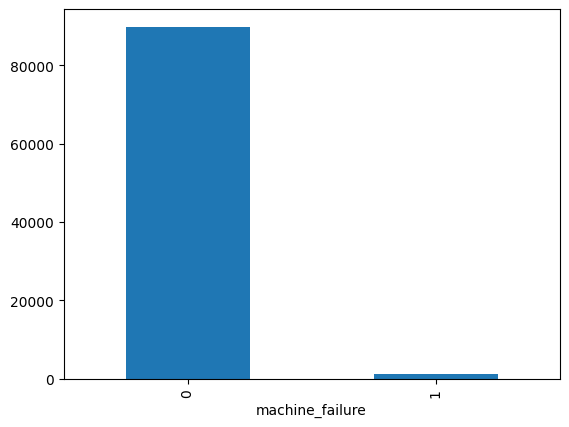

In [211]:
final_res["machine_failure"].value_counts().plot(kind="bar")

In [212]:
final_res.to_csv("machine_results.csv", index=False)

## Step 9 - Save the pre and model

In [213]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [214]:
best_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [215]:
import joblib
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [216]:
joblib.dump(best_model, "loan_model.joblib")

['loan_model.joblib']

## Load pre and model

In [217]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [218]:
m = joblib.load("loan_model.joblib")
m

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [219]:
m.score(xtrain_pre, ytrain)

0.9961884866642845

In [220]:
m.score(xtest_pre, ytest)

0.9961518727552591